# Google Forms and Pandas Data Import and Visualization

:::{admonition} Learning Objectives
* Be able to use google forms to create a survey  
* Be able to write a short python code to read the survey results and present in a table format  
* Be able to write a python code to analyze the table results displaying statistics on each numerical question (mean, median, std, 95% conf interval, t-test comparing column results)  
* Be able to write a python code to visually represent the data as a barchart, pie chart, scatter plot with error bars, etc.     
:::

## Creating your own poll using Google forms
  
  

<br>Open a Google form from your browser using the "Google apps" navigator icon shown below. This assumes you are logged in to your google account.  

:::{image} ../images/google_apps.png
:height: 200px
:align: center
:::

<img alt="open google forms" src="../images/google_apps.png" width=500px>

<br>Scroll down and open "Forms".  

:::{image} ../images/google_forms.png
:height: 400px
:align: center
:::

<img alt="open google forms" src="../images/google_forms.png" width=300px>

<br>Click on the "+" icon to create a new form (survey).

:::{image} ../images/create_new_form.png
:height: 250px
:align: center
:::

<img alt="open google forms" src="../images/create_new_form.png" width=200px>

<br>You should see the following:  

:::{image} ../images/create_your_survey.png
:height: 350px
:align: center
:::

<img alt="open google forms" src="../images/create_your_survey.png" width=500px>

<br> Play around with this form to add questions, change question types, etc.  When you are finished with your form, click on the "Send" button.  In the "Send form", shown below you can click on the link icon and copy the link address.  This can be pasted into an email and sent.  

:::{image} ../images/get_form_link.png
:height: 350px
:align: center
:::

<img alt="open google forms" src="../images/get_form_link.png" width=500px>

:::{admonition} Active Poll  
Take this 30 second poll on your drink preference and then we will analyze the data below.  https://forms.gle/utT4aii7tWLdesZr9  
:::

Send your survey to a few people so you can collect some data. Then, under the Responses tab of your created survey, you will see an option to download responses.  

:::{image} ../images/download_responses.png
:height: 400px
:align: center
:::

<img alt="open google forms" src="../images/download_responses.png" width=400px>

<br>Then we need to extract the zip file that was downloaded.  *If you don't know how to extract a zip file, use Google to search "how to extract a zip file".*  

:::{image} ../images/zip_file.png
:height: 250px
:align: center
:::

<img alt="open google forms" src="../images/zip_file.png" width=400px>

<br>Extracting the zip file creates the folder "MSE 3114 drink pref.csv" Yes this is a folder. The ".csv" here is not actually an extension.  If it bothers you, rename the folder.   

:::{image} ../images/zip_file_folder.png
:height: 250px
:align: center
:::

<img alt="open google forms" src="../images/zip_file_folder.png" width=400px>

<br>Rename this folder to **data**. *I just don't like the long name.*

:::{image} ../images/zip_folder_rename.png
:height: 250px
:align: center
:::

<img alt="open google forms" src="../images/zip_folder_rename.png" width=400px>

## Import and analyze the data
  
  

In [1]:
import os  #we use this to join our file path to our filename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #we will use this to perform a t-test

In [44]:
# To read a csv file on your own computer
# path = r'C:\Users\Sean\Downloads\data'
# filename='MSE 3114 drink pref.csv'
# fullpath=os.path.join(path,filename)
# raw=pd.read_csv(fullpath)

# To direct read a zip file containing a csv file
# fullpath="https://drive.google.com/uc?id=1uBJd4eIZgYL38YyG4AZsbpGvBuH9KCsQ"
# raw=pd.read_csv(fullpath,compression='zip')

# This is a live google sheet file linked to our google form poll responses.  The file must be shared to be read it this way.  
fullpath="https://docs.google.com/spreadsheets/d/13PLZ2N8txdPGn9P19VINPAMDup7ExLsh_Dso9_qLw0c/export?format=csv"
raw=pd.read_csv(fullpath)
raw.head()  #shows first 5 rows

,Timestamp,Score,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water."
0,8/27/2021 12:36:40,NaN,Strongly Disagree,Agree,Strongly Agree
1,8/27/2021 12:37:01,NaN,Neutral,Strongly Agree,Strongly Agree
2,8/27/2021 12:38:09,NaN,Disagree,Disagree,Disagree
3,8/27/2021 12:39:35,NaN,Strongly Disagree,Strongly Agree,Strongly Agree
4,8/27/2021 12:40:36,NaN,Agree,Agree,Strongly Agree


You can see here the survey responses are in the 3rd, 4th, and 5th columns.

In [5]:
from jupyterquiz import display_quiz

# tags:  remove-input
# menu: View/Cell toolbar/tags or in Jupyter lab use gear icon on top right
# this will remove the code below when building Jupyter-book 
# could also use remove-cell but this code has no output

example=[{
        "question": '''For the DataFrame above named `raw`, how would you select the 3rd column?''',
        "type": "multiple_choice",
        "answers": [
            {
                "code": "raw.iloc[:,2]",
                "correct": True,
                "feedback": "Correct. "
                "We could have used .loc[] rather than .iloc[] but then we would need to use the full column name, "
                "i.e. raw.loc[:,\"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi. \"].  "
                "By using .iloc[], we can slice by index number. " 
                "Columns begin with the index 0 so the third column "
                "has index = 2 and the ':' means all rows. "
            },
            {
                "code": "raw.iloc[:,3]",
                "correct": False,
                "feedback": '''Remember the index of the first column is 0 not 1.'''
            }
        ]
    }]

In [6]:
print("Do you remember how to slice a DataFrame using .loc and .iloc?")
display_quiz(example);

Do you remember how to slice a DataFrame using .loc and .iloc?



Let's take the 3rd, 4th, and 5th columns.  Since we are requesting more than one column, we will pass a list of columns in the 2nd position of `.iloc[rows, columns]`, e.g. `.iloc[:, [2,3,4]]`.  See the pandas guide for more information on [pandas.DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [45]:
data=raw.iloc[:,[2,3,4]]
data.head()

,"If I have to choose between Pepsi and Coke, I prefer to drink Pepsi.","If I have to choose between Sweet Tea and Unsweet Tea, I prefer to drink Sweet Tea.","If I have to choose between Water and Vanilla flavored Almond Milk, I prefer to drink Water."
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree


Let's shorten our column names.  The column labels are given by `data.columns` so we can rename them by setting `data.columns` directly to the new values.  

In [46]:
data.columns=['PepsiNotCoke', 'SweetTeaNotUnsweet', 'WaterNotAlmondMilk']
data.head()

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,Strongly Disagree,Agree,Strongly Agree
1,Neutral,Strongly Agree,Strongly Agree
2,Disagree,Disagree,Disagree
3,Strongly Disagree,Strongly Agree,Strongly Agree
4,Agree,Agree,Strongly Agree


We also need to convert the terms: "Strongly Agree = 4, Agree = 3, Neutral = 2, Disagree = 1, Strongly Disagree = 0" to numeric values to better analyze our results.  The easiest way is to use a dictionary "{ }" or key:value pairs and use the function [replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).  The notation looks like this:  

In [47]:
data=data.replace({'Strongly Agree': 4, 'Agree': 3, 'Neutral': 2, 'Disagree': 1, 'Strongly Disagree': 0})
data.head()

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
0,0,3,4
1,2,4,4
2,1,1,1
3,0,4,4
4,3,3,4


Now let's get some statistical data.  Pandas makes this easy with the [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function: 

In [48]:
data.describe()
#the 50% percentile is equal to the median

,PepsiNotCoke,SweetTeaNotUnsweet,WaterNotAlmondMilk
count,26.000000,26.000000,26.000000
mean,1.538462,3.346154,3.384615
std,1.240347,0.935620,1.061204
min,0.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,1.000000,4.000000,4.000000
75%,2.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


In [49]:
data.describe().iloc[1] #we could grab the mean data from above

PepsiNotCoke          1.538462
SweetTeaNotUnsweet    3.346154
WaterNotAlmondMilk    3.384615
Name: mean, dtype: float64

In [50]:
data.mean() #or we could use of mean() function

PepsiNotCoke          1.538462
SweetTeaNotUnsweet    3.346154
WaterNotAlmondMilk    3.384615
dtype: float64

Let's change the order of our columns so that they correspond with the order of the mean values.  

In [51]:
data.mean().sort_values(ascending=False) #this provides a sorted list of mean values

WaterNotAlmondMilk    3.384615
SweetTeaNotUnsweet    3.346154
PepsiNotCoke          1.538462
dtype: float64

The above hasn't changed our data in any way.  It just gave us a list of sorted column names along with their mean.  Now we could take this sorted list of header names and reindex our data columns.

In [52]:
header_names_sorted=data.mean().sort_values(ascending=False).index
data=data.reindex(header_names_sorted, axis=1) #axis=1 means reindex columns, rows are axis=0
data.head()

,WaterNotAlmondMilk,SweetTeaNotUnsweet,PepsiNotCoke
0,4,3,0
1,4,4,2
2,1,1,1
3,4,4,0
4,4,3,3


## Plotting using pandas

:::{note}
pandas uses matplotlib to graphically represent data organized in DataFrames.  Using pandas allows us to make complicated figures with very little coding.  We will look at several examples.  
:::

### Histogram

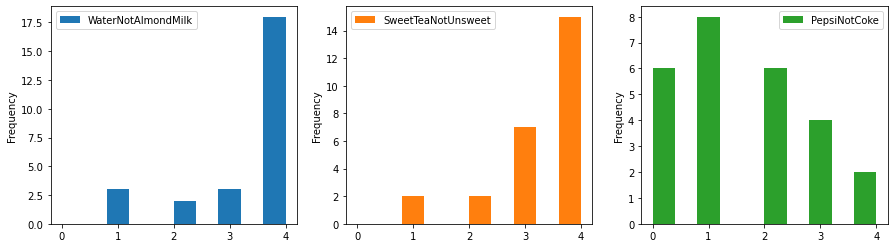

In [53]:
ax=data.plot.hist(subplots=True, legend=True, layout=(1, 3), figsize=(15,4))  #pandas plotting

I think maybe this will look better stacked and notice the plots are sorted by mean value since we changed the order of our columns previously.  

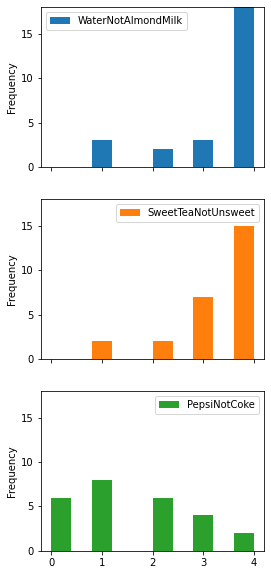

In [54]:
ax=data.plot.hist(subplots=True, legend=True, layout=(3, 1), figsize=(4,10), bins=10, ylim=[0,18])  #pandas plotting

### Bar charts

We could also make a horizontal bar chart of our mean values: 

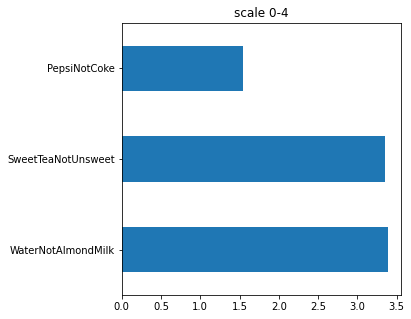

In [55]:
data_mean=data.mean()
ax=data_mean.plot(subplots=True,kind='barh',figsize=(5,5), stacked=True, label="scale 0-4")

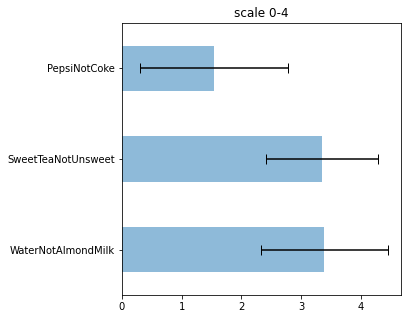

In [56]:
ax=data_mean.plot(alpha=0.5,subplots=True,kind='barh',figsize=(5,5), stacked=True, label="scale 0-4",xerr=data.std(), capsize=5)

### Box plot

<br> Another type of plot that can be useful is the box plot. Here is the meaning of the box plot:

:::{image} ../images/box_plot.png
:height: 250px
:align: center
:::

<img alt="open google forms" src="../images/box_plot.png" width=500px>

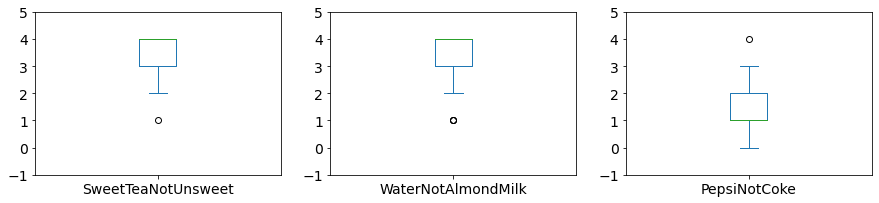

In [91]:
ax=data.plot(subplots=True,kind='box',figsize=(15,3), ylim=(-1,5), layout=(1,3), fontsize=14)

### Pie chart

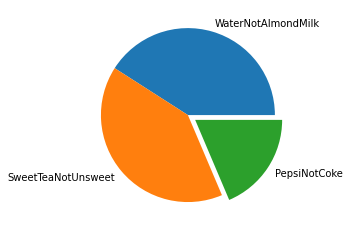

In [57]:
ax=data_mean.plot(kind='pie', explode=[0,0,0.1], labels=data_mean.index, label="", shadow=False, startangle=0)

### scipy.stats

Let's use a paired t-test to see if the mean values for our data are significantly different from one another. We will use the standard p-value of <= 0.05 to conclude that the means are significantly different. 

Here we test whether the preference to drink Pepsi over Coke is significantly different than the preference to drink Water over Almond Milk.  

In [58]:
t,p=stats.ttest_rel(data.loc[:,'PepsiNotCoke'], data.loc[:,'WaterNotAlmondMilk'])
print(t)
print(p)

-5.820855000871991
4.538064084376436e-06


Since our p value shown above (3.57e-6) is less than 0.05, we conclude that their is a significant difference in preference for drinking Pepsi over Coke as compared to drinking Water over Almond Milk.  In the example above, a mean of 2.0 would be no preference.  Based on the data the class has a preference for coke and a preference for water.  Now lets compare the mean of WaterNotAlmondMilk to the mean of SweatTeaNotUnsweet.  

In [59]:
t,p=stats.ttest_rel(data.loc[:,'SweetTeaNotUnsweet'], data.loc[:,'WaterNotAlmondMilk'])
print(t)
print(p)

-0.13736056394868904
0.8918461009519117


Since our p value above is greater than 0.05, we conclude that the mean of WaterNotAlmondMilk is statistically the same as the mean of SweetTeaNotUnsweet.  

Here are some khan videos on the t-test if you are interested but you will get more of this in Design of Experiments.  

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/alternative-hypothesis-for-2-sample-t-test

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/example-of-hypotheses-for-paired-and-2-sample-t-tests

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/e/hypotheses-two-sample-t-test-means

https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means



## Exercises

### Problem 1

For homework, create your own survey in Google forms that will allow you to rank at least 4 features /items by collecting opinion data on 4 corresponding survey questions and have at least 10 people take it.  The more data you have the better if you can get more than 10.  Send it to family, friends, etc.  The 4 questions should use the same scale so that you will be able to compare.  Use the 5-point likert scale.  

Download your survey responses and find the mean, std, median, max and min values for each column.  Analyze your survey data by creating at least 3 different plots/charts summarizing aspects of your data.  Perform a t-test to compare the mean values between three pairs of data.  Indicate whether the mean values are significantly different from each another for each pair.  

At least one of your plots/charts should be something that I did not do in the lesson.  

### Problem 2

In [60]:
df=pd.DataFrame([[3, 4, 0],[4, 4, 2],[1, 1, 1],[4, 4, 0],[3, 4, 3],[4, 1, 0],[4, 4, 1],[2, 4, 0],[4, 2, 3],[4, 4, 0]], columns=['SweetTeaNotUnsweet', 'WaterNotAlmondMilk', 'PepsiNotCoke'])
df

,SweetTeaNotUnsweet,WaterNotAlmondMilk,PepsiNotCoke
0,3,4,0
1,4,4,2
2,1,1,1
3,4,4,0
4,3,4,3
5,4,1,0
6,4,4,1
7,2,4,0
8,4,2,3
9,4,4,0


I'm trying to perform a slice of the above data to get the 1st and 3rd columns along with the 4th, 5th, and 6th rows as shown below.   

:::{image} ../images/week_2_prob_2.png
:height: 175px
:align: center
:::

<img alt="open google forms" src="../images/week_2_prob_2.png" width=300px>

I tried the following line of code but it doesn't work.   

In [61]:
df.iloc[[0,2],3:5]

""
0
2


Correct this line of code to give the desired output. 

### Problem 3

I'm trying to find the sqrt of 3 using numpy but I'm getting the following error.  What is wrong?

:::{image} ../images/week_2_prob_3.png
:height: 225px
:align: center
:::

<img alt="open google forms" src="../images/week_2_prob_3.png" width=600px>

To do this problem, you want to open a new blank notebook.  Then type np.sqrt(3), in the first line and run it.    

### Problem 4

Why is the cosine of 90 degrees below giving me the wrong answer?  

In [80]:
np.cos(90)

-0.4480736161291701